Sumber data: https://www.kaggle.com/datasets/linkgish/indonesian-salary-by-region-19972022

In [15]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Baca Dataset

In [16]:
# Importing the dataset
ump_data = pd.read_csv("salary.csv")
ump_data

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997
...,...,...,...
865,MALUKU,2619312,2022
866,MALUKU UTARA,2862231,2022
867,PAPUA BARAT,3200000,2022
868,PAPUA,3561932,2022


In [17]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(ump_data, test_size=0.2, random_state=42)

## Melatih Model

In [18]:
# Train a linear regression model for each region using the training data
models = {}
for region in train_data['REGION'].unique():
    X_train = train_data.loc[train_data['REGION'] == region]['YEAR'].values.reshape(-1, 1)
    y_train = train_data.loc[train_data['REGION'] == region]['SALARY'].values.reshape(-1, 1)
    model = LinearRegression().fit(X_train, y_train)
    models[region] = model
    
models

# Evaluate the models on the test data and print the prediction score for each model
for region in test_data['REGION'].unique():
    X_test = test_data.loc[test_data['REGION'] == region]['YEAR'].values.reshape(-1, 1)
    y_test = test_data.loc[test_data['REGION'] == region]['SALARY'].values.reshape(-1, 1)
    model = models[region]
    score = model.score(X_test, y_test)
    print(f"Region {region}, prediction score \t = {score}")

Region KEP. BANGKA BELITUNG, prediction score 	 = 0.8974995712066577
Region BENGKULU, prediction score 	 = 0.8201756884898136
Region LAMPUNG, prediction score 	 = 0.12753731046009276
Region KALIMANTAN TENGAH, prediction score 	 = 0.9754999525014382
Region ACEH, prediction score 	 = 0.8789029695129059
Region SULAWESI TENGGARA, prediction score 	 = 0.46495270882807416
Region RIAU, prediction score 	 = 0.9244560155774424
Region BANTEN, prediction score 	 = 0.9881252742263511
Region DI YOGYAKARTA, prediction score 	 = 0.872120608571257
Region SULAWESI UTARA, prediction score 	 = 0.8574217478269823
Region JAMBI, prediction score 	 = 0.7362686327084091
Region BALI, prediction score 	 = 0.9136413683986894
Region MALUKU, prediction score 	 = 0.9397082466551514
Region KALIMANTAN TIMUR, prediction score 	 = 0.5538440475870896
Region SUMATERA SELATAN, prediction score 	 = -1.3816185998431116
Region SUMATERA BARAT, prediction score 	 = 0.8684265043283965
Region SULAWESI SELATAN, prediction score 	

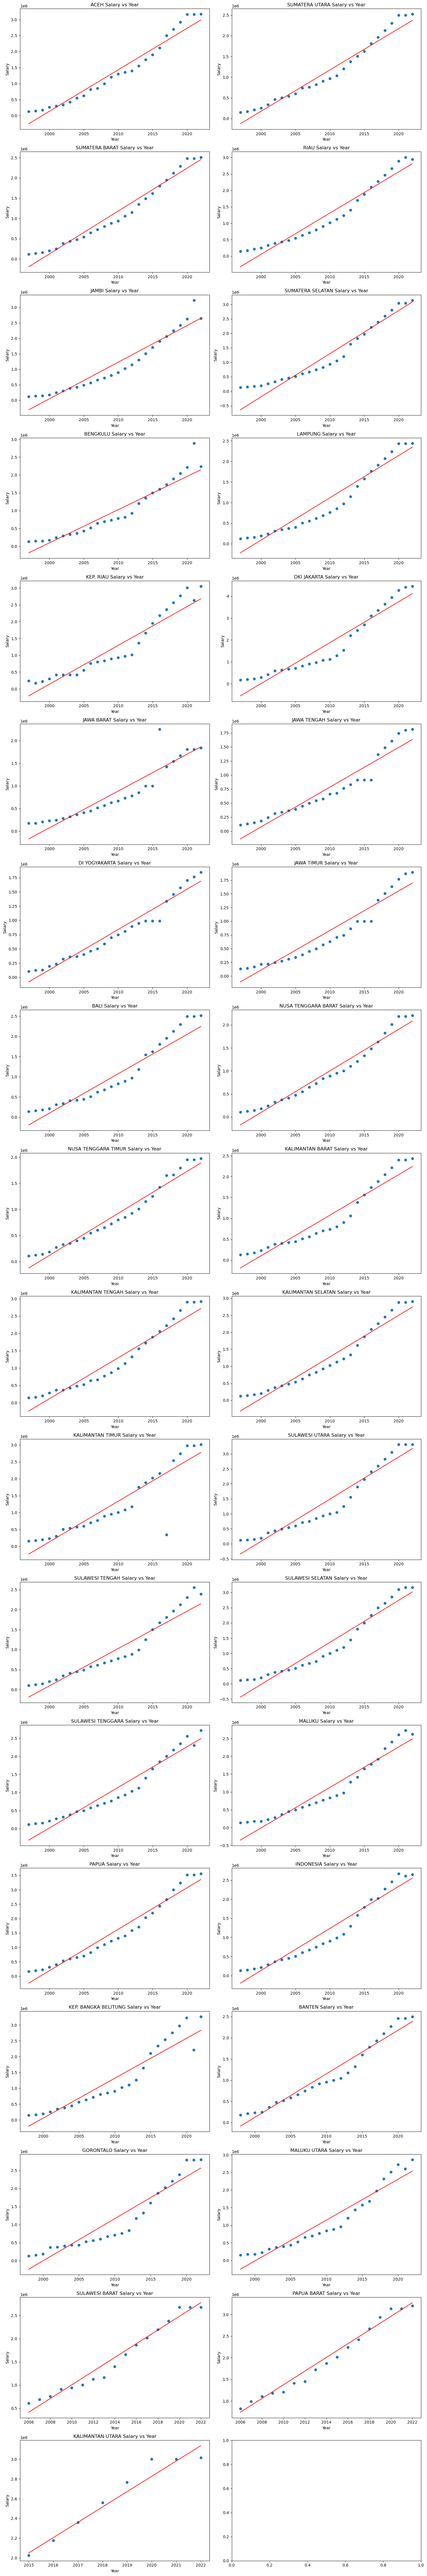

In [19]:
regions = ump_data['REGION'].unique()
n_regions = len(regions)
n_rows = (n_regions + 1) // 2 # Round up to the nearest integer
n_cols = 2
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

for i, region in enumerate(regions):
    row = i // n_cols
    col = i % n_cols
    X = ump_data.loc[ump_data['REGION'] == region]['YEAR'].values.reshape(-1, 1)
    y = ump_data.loc[ump_data['REGION'] == region]['SALARY'].values.reshape(-1, 1)
    model = models[region]
    y_pred = model.predict(X)
    
    ax = axs[row, col]
    ax.scatter(X, y)
    ax.plot(X, y_pred, color='red')
    ax.set_title(f"{region} Salary vs Year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Salary")
    
plt.tight_layout()
plt.show()


## Prediksi Sampai Tahun 2045

In [29]:
# generates an array of future years
future_years = np.array(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 24))
future_ump = []
for provinsi in ump_data['REGION'].unique():
    model = models[provinsi]
    future_ump_provinsi = model.predict(future_years.reshape(-1, 1)) # use model to predict the salary for each year
    future_ump.extend(future_ump_provinsi)


In [21]:
# create dataframe and insert the predicted data to dataframe
future_df = pd.DataFrame({
    'REGION': np.repeat(ump_data['REGION'].unique(), 23),
    'YEAR': np.tile(range(ump_data['YEAR'].max() + 1, ump_data['YEAR'].max() + 24), ump_data['REGION'].nunique()),
    'SALARY': future_ump
})
future_df

,REGION,YEAR,SALARY
0,ACEH,2023,[3113319.1342530847]
1,ACEH,2024,[3242861.994617492]
2,ACEH,2025,[3372404.8549818993]
3,ACEH,2026,[3501947.7153462768]
4,ACEH,2027,[3631490.575710684]
...,...,...,...
800,KALIMANTAN UTARA,2041,[6087801.1882353425]
801,KALIMANTAN UTARA,2042,[6243115.952941179]
802,KALIMANTAN UTARA,2043,[6398430.717647076]
803,KALIMANTAN UTARA,2044,[6553745.482352972]


In [30]:
# change the salary datatype
future_df['SALARY'] = future_df['SALARY'].astype(int)
future_df

,REGION,YEAR,SALARY
0,ACEH,2023,3113319
1,ACEH,2024,3242861
2,ACEH,2025,3372404
3,ACEH,2026,3501947
4,ACEH,2027,3631490
...,...,...,...
800,KALIMANTAN UTARA,2041,6087801
801,KALIMANTAN UTARA,2042,6243115
802,KALIMANTAN UTARA,2043,6398430
803,KALIMANTAN UTARA,2044,6553745


## Menggabungkan Data sebelumnya dengan data yang baru

In [23]:
# combined the original data with the future data
combined_df = pd.concat([ump_data, future_df],axis=0,ignore_index=True)
combined_df

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997
...,...,...,...
1670,KALIMANTAN UTARA,6087801,2041
1671,KALIMANTAN UTARA,6243115,2042
1672,KALIMANTAN UTARA,6398430,2043
1673,KALIMANTAN UTARA,6553745,2044


## Menampilkan Perkembangan Salary

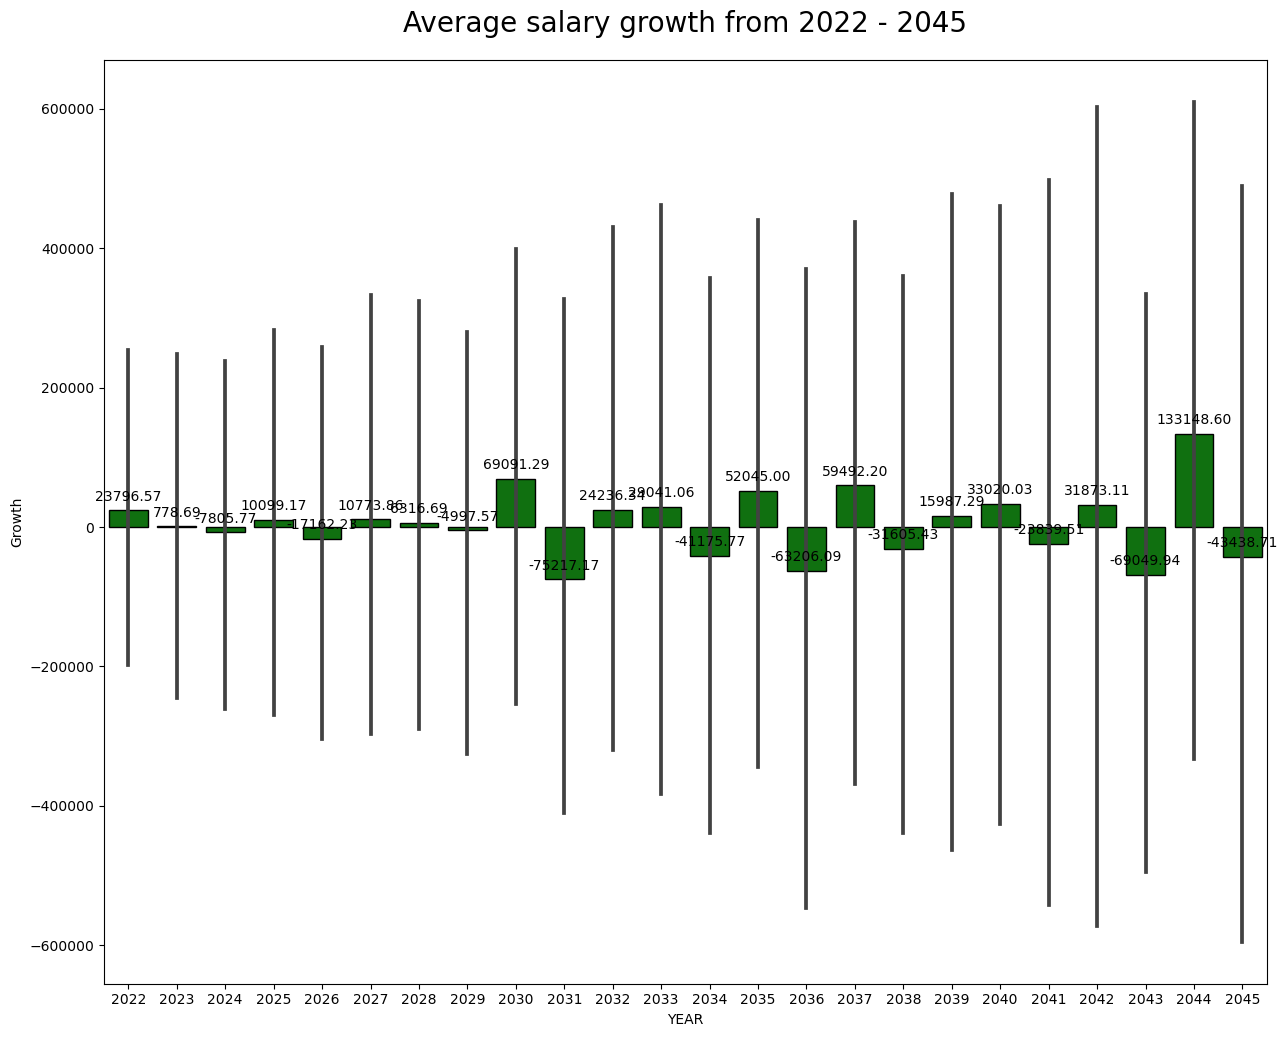

In [24]:
AVG = combined_df.sort_values(by='YEAR', ascending=True)

AVG['Growth'] = [0] + [AVG['SALARY'].iloc[i] - AVG['SALARY'].iloc[i-1] for i in range(1, len(AVG))]

plt.figure(figsize=(15,12))
plt.title("Average salary growth from 2022 - 2045", size=20, pad=20)

AVG_filtered = AVG.query('YEAR >= 2022 and YEAR <= 2045')

ax = sns.barplot(x='YEAR', y='Growth', data=AVG_filtered, color='green', edgecolor="black")

# loop through each bar and annotate
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
                
plt.show()

## Menampilkan Rata rata untuk seluruh data berdasarkan tahun


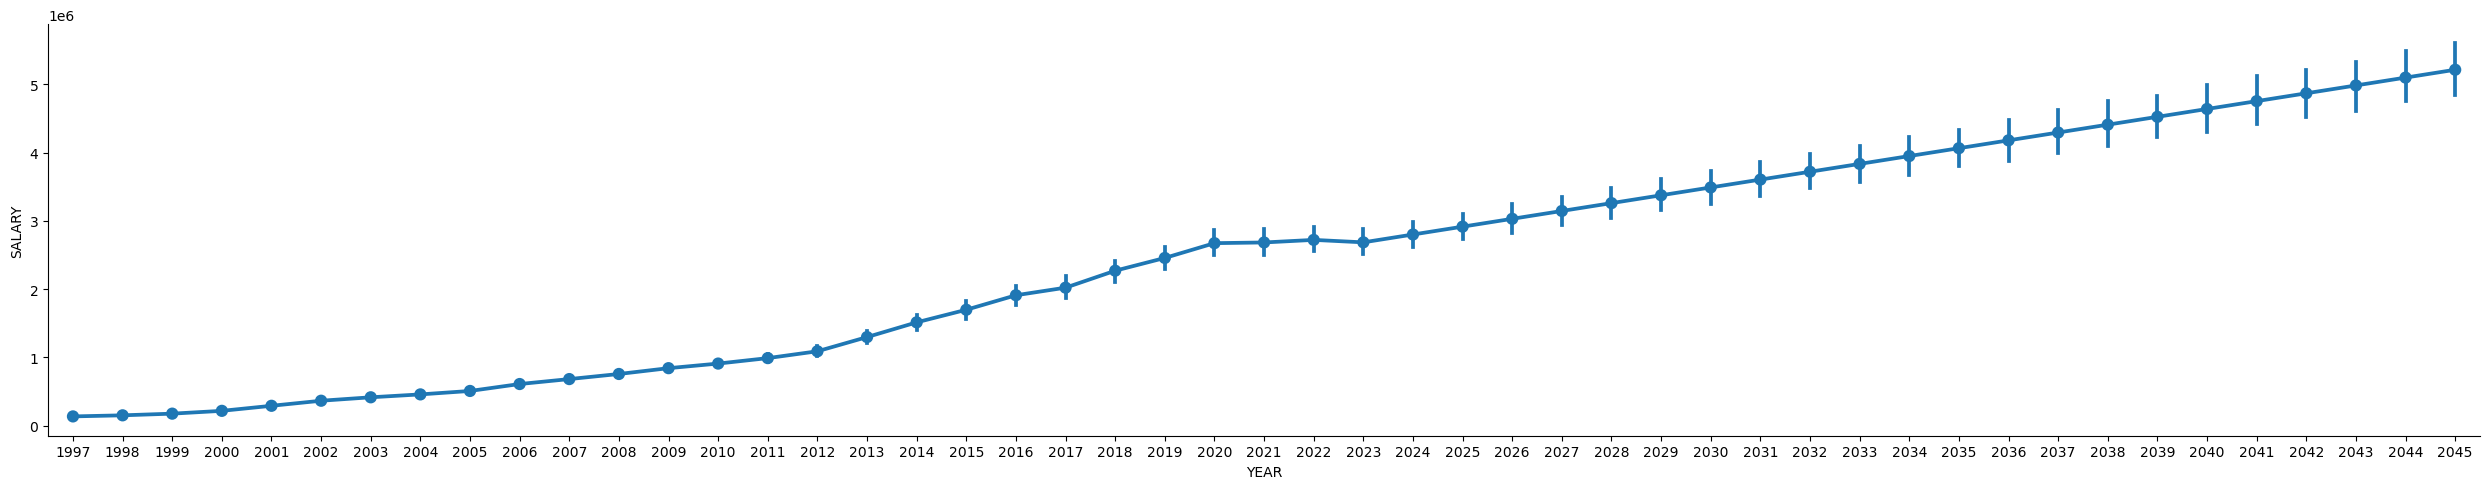

In [25]:
sns.catplot(x='YEAR', y='SALARY', data=combined_df, kind='point', aspect=5)

In [26]:
# shows salary growth using barchart
import plotly.express as px

fig = px.bar(combined_df, x='REGION', y="SALARY",color="REGION",
  animation_frame="YEAR", range_y=[0,9000000])
fig.show()

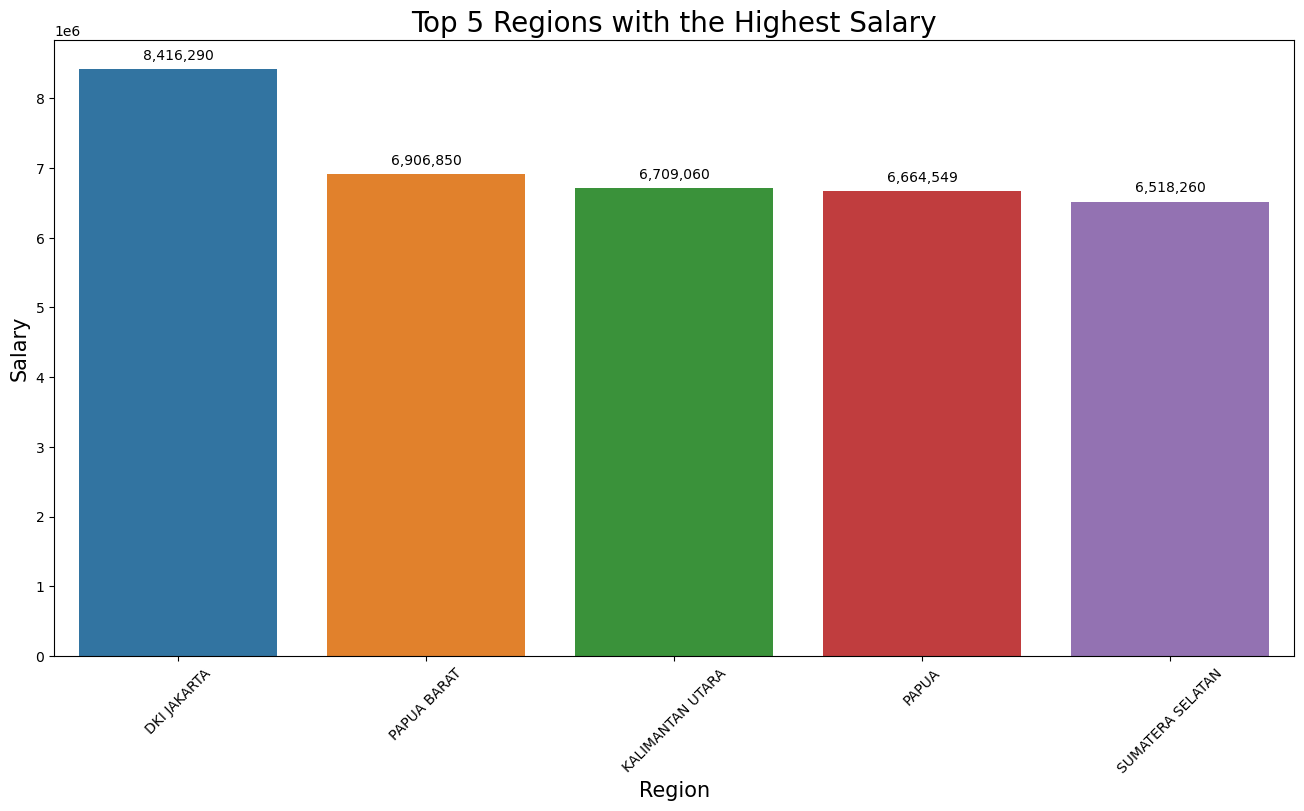

In [27]:
# Filter data for the last year
latest_year = combined_df['YEAR'].max()
combined_df_latest_year = combined_df[combined_df['YEAR'] == latest_year]

# Take 5 regions with the highest salary
top_5_regions = combined_df_latest_year.groupby('REGION')['SALARY'].max().sort_values(ascending=False)[:5]
top_5_regions = top_5_regions.reset_index()

# Displays 5 regions based on the highest salary
plt.figure(figsize = (16, 8))
graph = sns.barplot(x = 'REGION', y = 'SALARY', data=top_5_regions, order=top_5_regions['REGION'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.title('Top 5 Regions with the Highest Salary', fontsize=20)

for index, row in top_5_regions.iterrows():
    graph.annotate(format(int(row['SALARY']), ','),
                   (row.name, row['SALARY']),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

## Mendapatkan Rata-rata salary untuk tahun 2045

In [28]:
# Convert 'year' column to datetime
combined_df['YEAR'] = pd.to_datetime(combined_df['YEAR'], format='%Y')

def get_average_salary_latest_year(df):
    # Find the latest year
    latest_year = df['YEAR'].max().year
    # Filter data for the latest year
    latest_year_data = df[df['YEAR'] == df['YEAR'].max()]

    # Calculate the average salary for the latest year
    average_salary = latest_year_data['SALARY'].mean()

    average_salary_formatted = 'Rp {:,}'.format(int(average_salary)).replace(',', '.')

    return average_salary_formatted, latest_year


# Call the function with the combined_df DataFrame
average_salary, year = get_average_salary_latest_year(combined_df)
print(f"Average salary for year {year}: {average_salary}")

Average salary for year 2045: Rp 5.212.017
